In [8]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url='https://images.codebasics.io/filters:format(webp)/fit-in/600x600/uploads/learner-portfolio/projects/thumbnail/66805/65cce5506cd08/a50653958b.png',width=10000 )

# Project Name - DIWALI SALES ANALYSIS - 2023

## Data analyazed by:-

**1. Chinmay Kulkarni**<br>**2. Rohan Khorate**

## Problem Statement :-
**The Diwali Sales Analysis-2023 event generated a large volume of sales data that needs to be analyzed to gain actionable insights. The key challenge is to understand customer behavior and purchasing patterns across different regions, demographics, and occupations.** 



## Objective :-

**The objective of the Diwali Sales 2023 project is to analyze sales data based on the following criteria:**<br>

**1. Count of Orders in Various Zones: Identify which zones generated the most orders.**<br>
**2. Gender-based Orders by Zone: Determine whether males or females ordered more in each zone.**<br>
**3. Age Group Order Count: Identify which age groups placed the most orders.**<br>
**4. Orders by States: Analyze the distribution of orders across different states.**<br>
**5. Orders by Occupations: Assess which occupations contributed the most to sales.**<br>



## Importing Libraies 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## 1. Then import csv file 

In [2]:
df = pd.read_csv(r'C:\Users\Admin\Desktop\Rohan_Khorate\Python_Diwali_Sales_Analysis-main\Diwali Sales Data.csv', encoding='unicode_escape')
# r is use to avoid the special char in the string 
# to avoid encoding error, use 'unicode_escape'

In [3]:
#after Calling df.shape Function you will see how many rows and columes are there in the data that you loaded
df.shape

(11251, 15)

## Data Cleaning

In [4]:
#To Check the colomes in the data use df.head()
df.head(10)
# df.head(10) gives you 10 rows from the DataSet

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [5]:
df.info()
#This info() gives you all information of the Data Set How Many Entries are there, how many Null values are there.
# df.info() is also use for Data cleaning purpose

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
# To Delete the data or table in python we can use, 'Drop()'
# Drop unrelatable/blank columes  
df.drop(['Status','unnamed1','Marital_Status'], axis=1, inplace=True)
#inplace=true is use to save the following table after the drop()

In [7]:
df.info()
# To see are the coloumes are deleted or not

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   State             11251 non-null  object 
 7   Zone              11251 non-null  object 
 8   Occupation        11251 non-null  object 
 9   Product_Category  11251 non-null  object 
 10  Orders            11251 non-null  int64  
 11  Amount            11239 non-null  float64
dtypes: float64(1), int64(3), object(8)
memory usage: 1.0+ MB


In [8]:
pd.isnull(df)
#To see the null values where there is false there is not null value there is stored something
# we will not get the total all values so we have do sum of the all null values

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,State,Zone,Occupation,Product_Category,Orders,Amount
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False
11247,False,False,False,False,False,False,False,False,False,False,False,False
11248,False,False,False,False,False,False,False,False,False,False,False,False
11249,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
pd.isnull(df).sum()
# .sum() gives the total null values in the Data Set

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [10]:
df.dropna(inplace=True)
# this function delete the 12 null values as shown in the above data

In [11]:
df.shape

(11239, 12)

In [12]:
pd.isnull(df).sum()
#there is no NULL Values now

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [13]:
# In The above Data Set Amount datatype is Float we have to change it to 'int'
# use astype()
#ToChange Data Type
df['Amount'] = df['Amount'].astype('int')

In [14]:
df['Amount'].dtypes
# we have check the datatype is actually change or not by .dtypes()

dtype('int64')

In [15]:
# to known how many columes in the data
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'State', 'Zone', 'Occupation', 'Product_Category', 'Orders', 'Amount'],
      dtype='object')

In [16]:
# if you want to reaname the columes
df.rename(columns={'User_ID' : 'User'})

,User,Cust_name,Product_ID,Gender,Age Group,Age,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,Karnataka,Southern,Agriculture,Office,3,206


In [17]:
df.describe()
# describe() returns description of the data in the dataFrames like (mean ,max, min of the columns)

,User_ID,Age,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,2.489634,9453.610553
std,1.716039e+03,12.753866,1.114967,5222.355168
min,1.000001e+06,12.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,4.000000,23952.000000


In [18]:
# if you want to apply the describe() for specific columns then
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis(EDA)

*1. Count of orders in various Zones.*

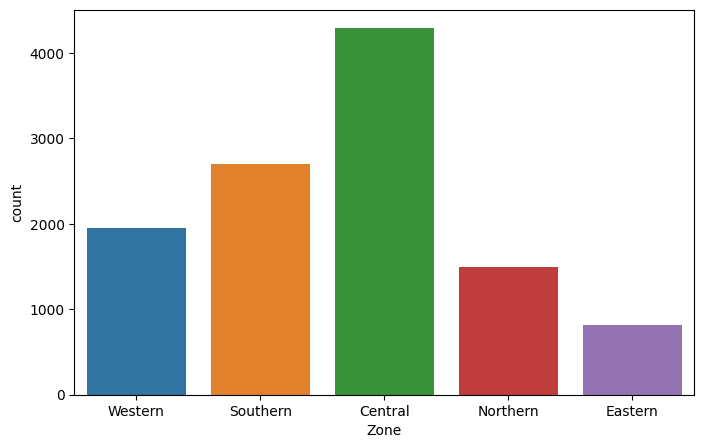

In [19]:
plt.figure(figsize=(8,5))
sns.countplot(x='Zone', data=df, hue='Zone')
plt.show()

## 1. GENDER

*2. Count the number of male and female in which Zone have Ordered More.*

In [20]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'State', 'Zone', 'Occupation', 'Product_Category', 'Orders', 'Amount'],
      dtype='object')

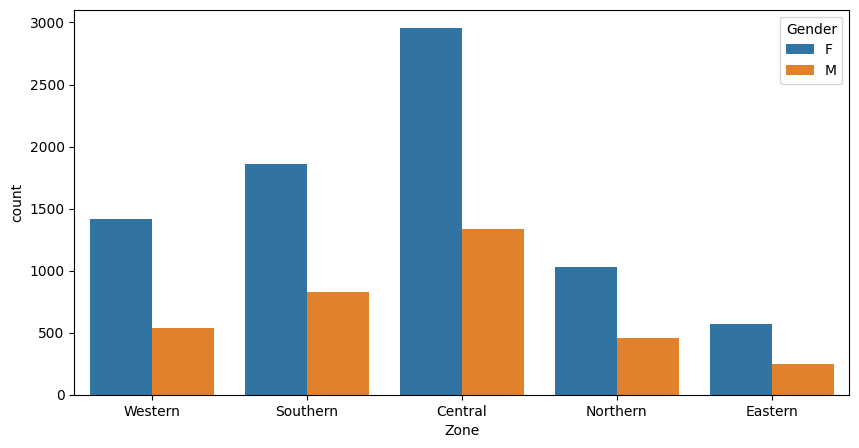

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(x='Zone', data=df, hue='Gender')
plt.show()

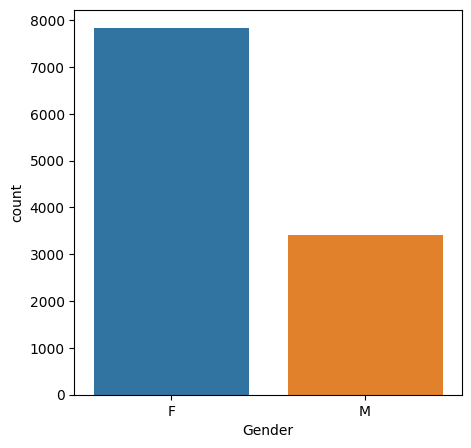

In [22]:
plt.figure(figsize=(5,5))
sns.countplot(x='Gender', data=df, hue="Gender")
plt.show()

In [23]:
gender_df = df.groupby('Gender')

In [24]:
gender_df.size()

Gender
F    7832
M    3407
dtype: int64

**From above graph shows that females do more orders then male**

1. Number of Count of Females are - 7832
2. Number of Count of Males are - 3407 

In [25]:
gender_labels = df['Gender'].value_counts().index

In [26]:
gender_val = df['Gender'].value_counts().values

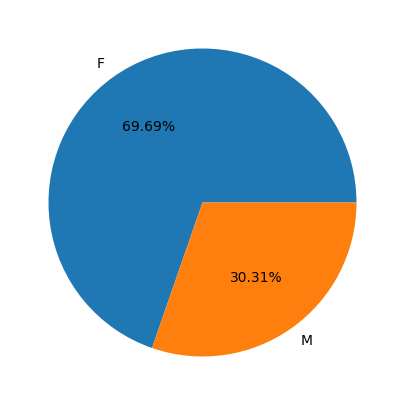

In [27]:
plt.figure(figsize=(10,5))
plt.pie(x=gender_val, labels=gender_labels, data=df,autopct='%1.2f%%')
plt.xticks(rotation=90)
plt.show()

## 2. AGE GROUP

*3. Count of age groups that have more orders.*

In [28]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'State', 'Zone', 'Occupation', 'Product_Category', 'Orders', 'Amount'],
      dtype='object')

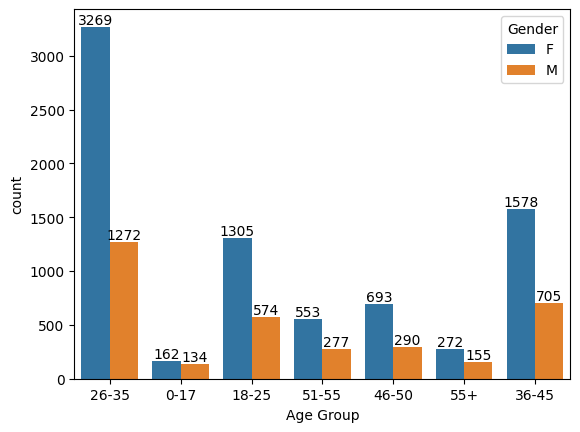

In [29]:
ax = sns.countplot(data=df, x='Age Group', hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)

From above graph we can see that most of the buyers are age group between 26-35 yrs Female.

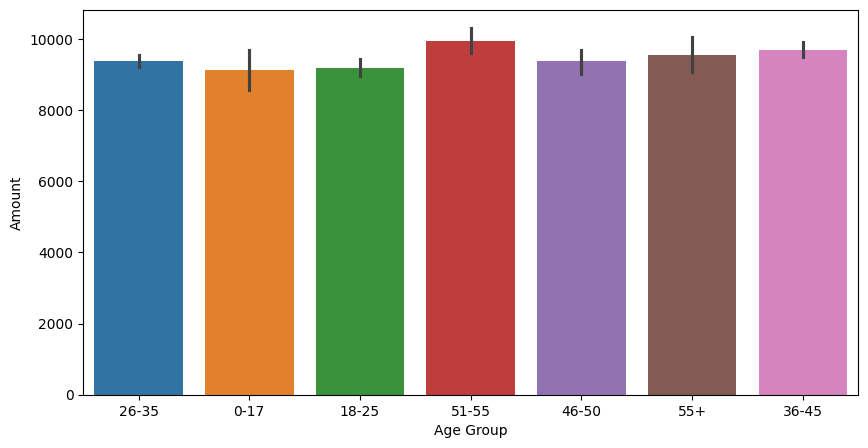

In [30]:
plt.figure(figsize=(10,5))
sns.barplot(x='Age Group', y='Amount', data=df, hue='Age Group')
plt.show()

In [31]:
age_group_df = df.groupby('Age Group')

In [32]:
age_group_df['Amount'].mean()

Age Group
0-17     9120.449324
18-25    9175.482704
26-35    9384.153711
36-45    9699.953570
46-50    9367.084435
51-55    9953.586747
55+      9557.346604
Name: Amount, dtype: float64

## 3. STATE 

*4. Orders By States*

In [33]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'State', 'Zone', 'Occupation', 'Product_Category', 'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='State', ylabel='Amount'>

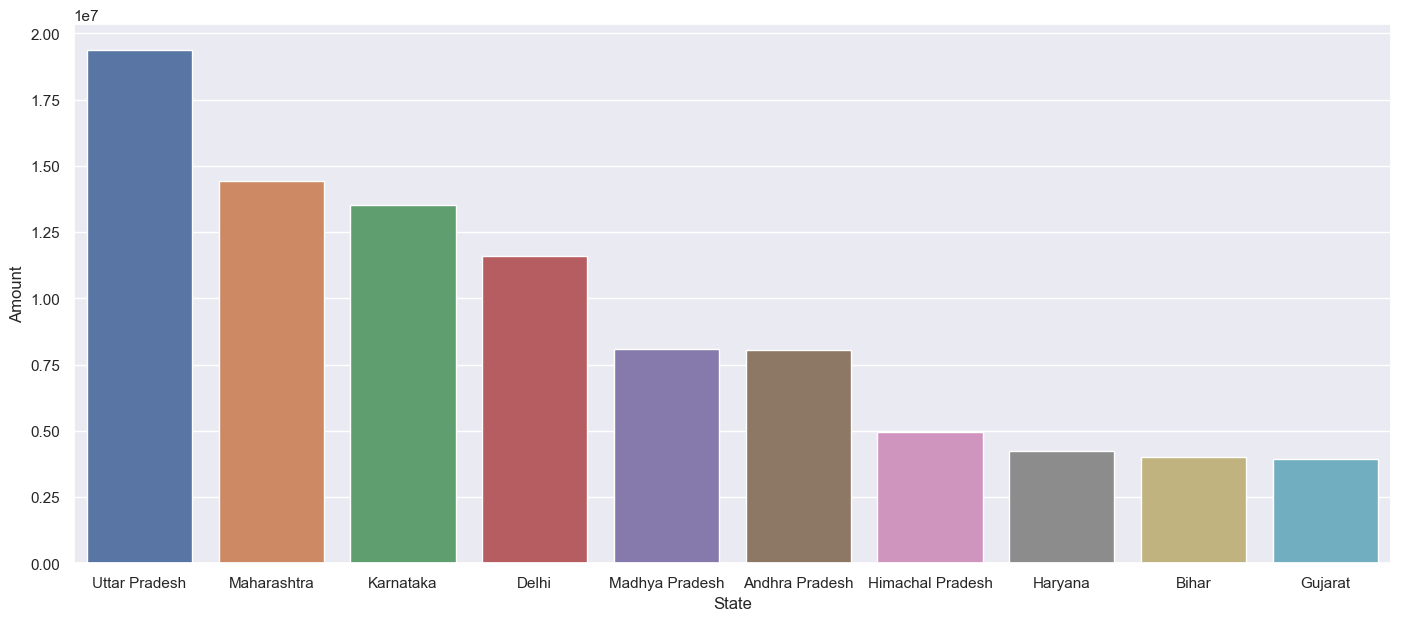

In [34]:
sales_state = df.groupby(['State'], as_index= False)['Amount'].sum().sort_values(by=['Amount'], ascending=False).head(10)

sns.set(rc={'figure.figsize':(17,7)})
sns.barplot(data= sales_state, x='State', y ='Amount', hue='State')

**we can see that most of the orders from uttar Pradesh, Maharastra and karnataka.**

In [35]:
state_labels = df['State'].value_counts().index

In [36]:
state_val = df['State'].value_counts().values

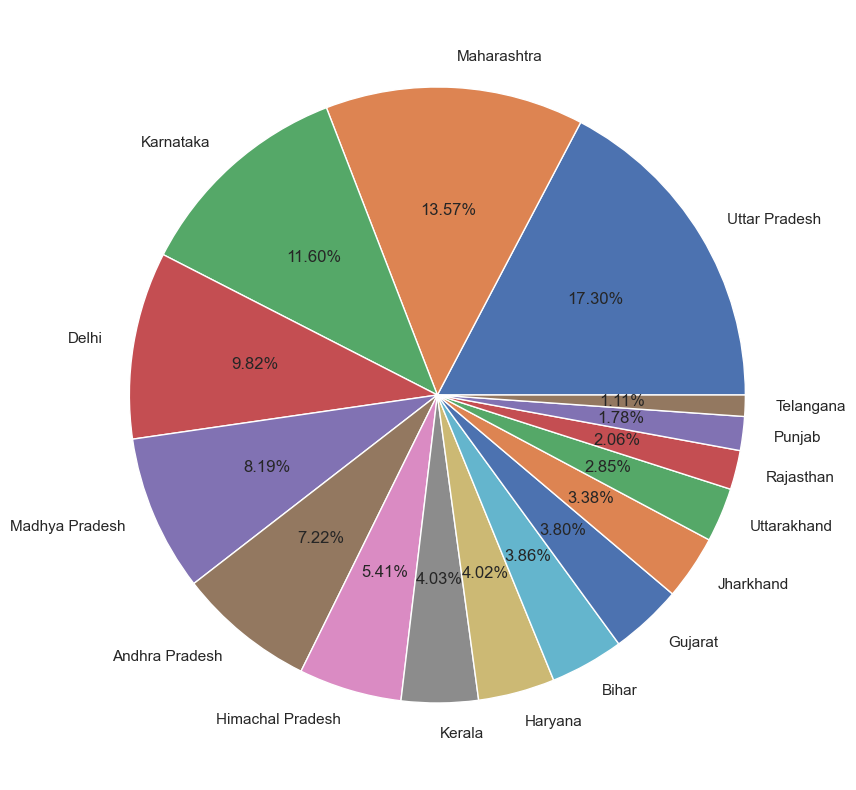

In [37]:
plt.figure(figsize=(15,10))
plt.pie(x=state_val, labels=state_labels, data=df,autopct='%1.2f%%')
plt.xticks(rotation=90)
plt.show()

## 4. Ocupation 

*5. Orders by Ocupations.* 

In [38]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'State', 'Zone', 'Occupation', 'Product_Category', 'Orders', 'Amount'],
      dtype='object')

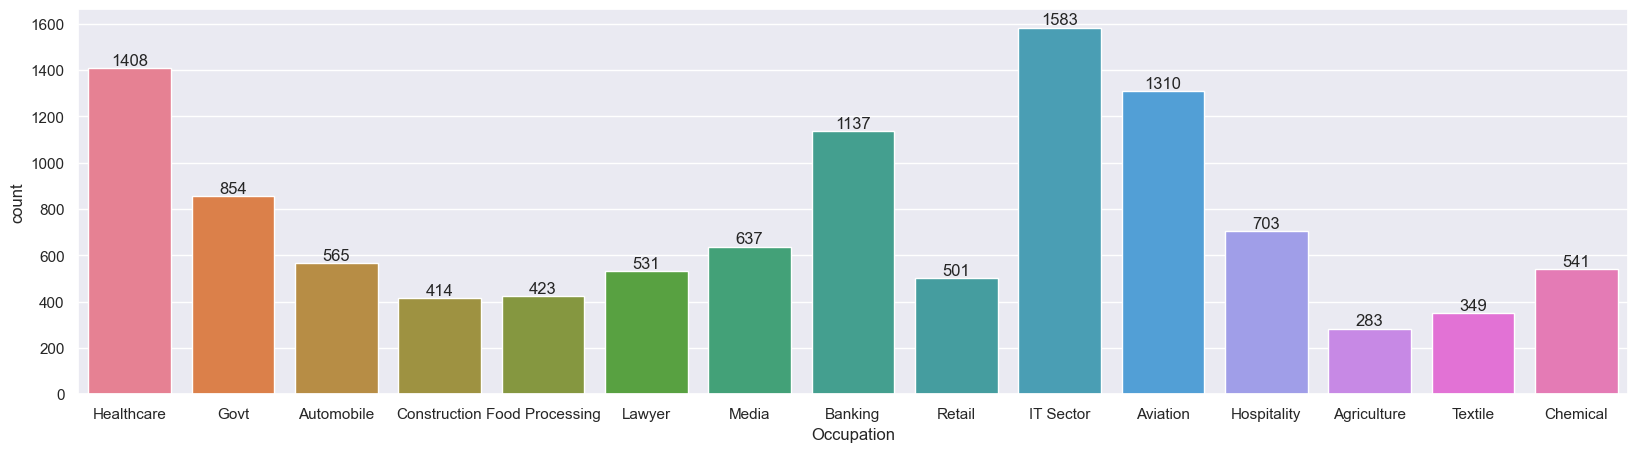

In [39]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(x='Occupation', data=df , hue='Occupation')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

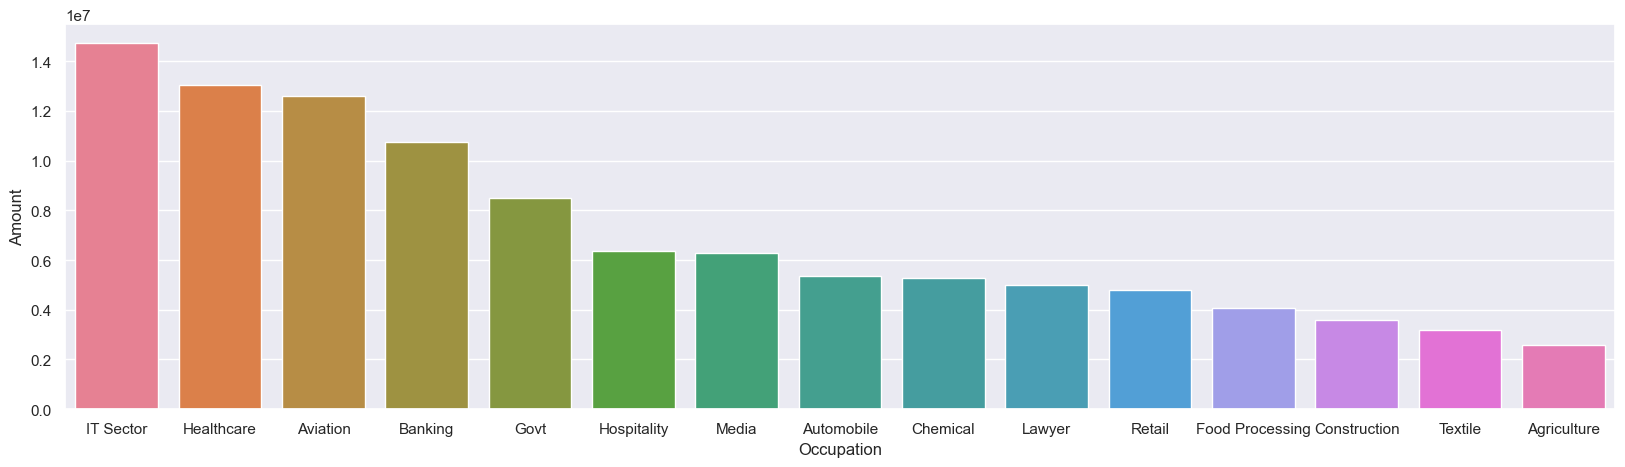

In [40]:
sales_State = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='Occupation', y='Amount', data=sales_State, hue='Occupation')

**From Above Graph we can see that most of the buyer are working in It Sector, Healthcar Sector ans Aviation Sector.**

**Also from the above graph we can see that less number of buyers are from Construction, Textile & Agri Sector**

## 5. Product Catogary

In [41]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'State', 'Zone', 'Occupation', 'Product_Category', 'Orders', 'Amount'],
      dtype='object')

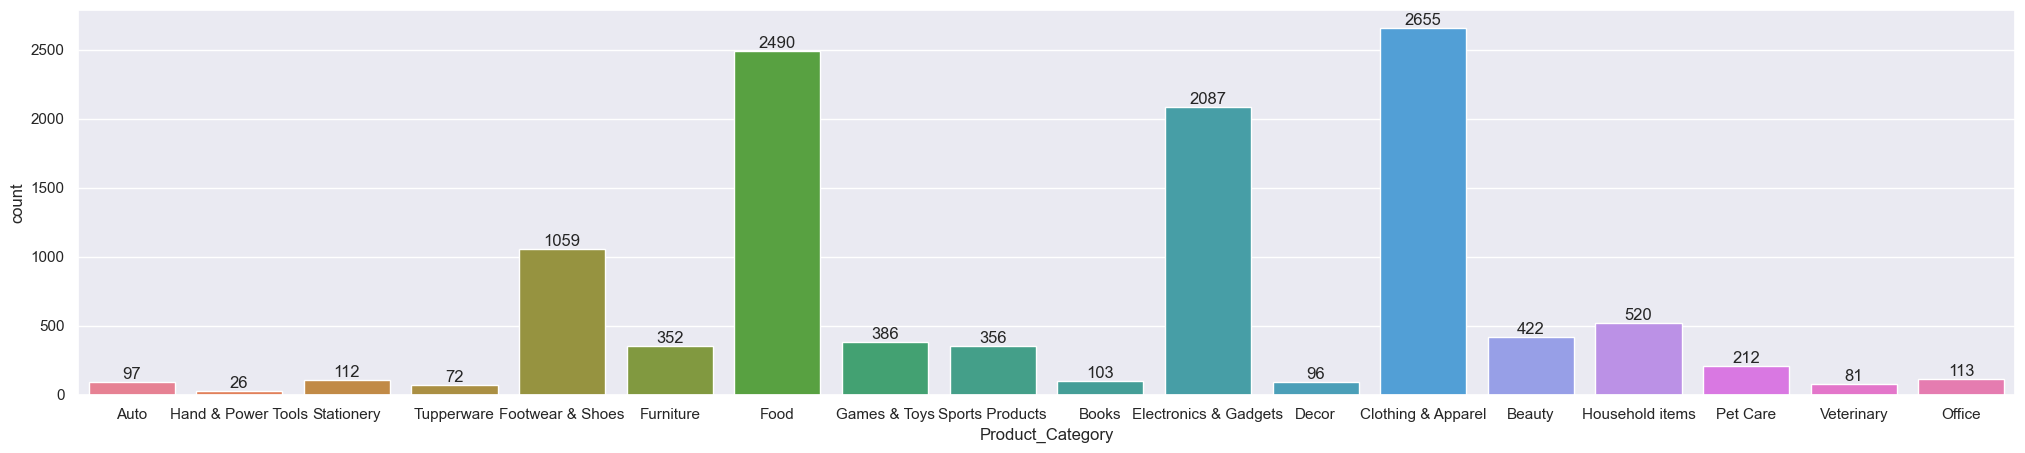

In [42]:
sns.set(rc={'figure.figsize': (25,5)})
ax = sns.countplot(x='Product_Category', data= df, hue='Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

**From above Figure we see most of the top order are Clothing & Apparel, Food and ELectronics & Gadgets.**

<Axes: xlabel='Product_Category', ylabel='Amount'>

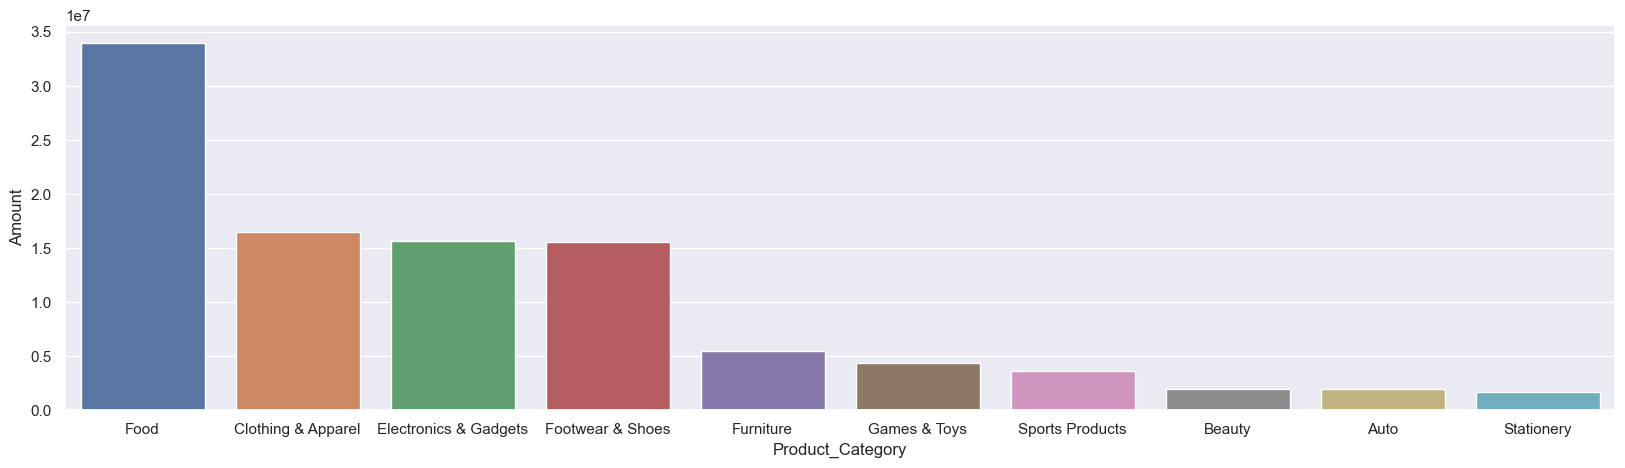

In [43]:
products = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize': (20,5)})
sns.barplot(data = products, x= 'Product_Category', y='Amount', hue='Product_Category')

**From Above graph we can see that most of the order sold products are Food, Clothing & ELectronics & Gadgets.**

# Conclusion 

**People aged 26-35 years, employed in the IT, healthcare, and aviation sectors, and residing in Uttar Pradesh, Maharashtra, and Karnataka, are more likely to purchase products in the food, clothing, and electronics categories**   